In [25]:
#matplotlib notebook
import matplotlib as mpl
import time
import matplotlib.pyplot as plt
from qutip import *
from qutip.piqs import *
import numpy as np
import array

from tqdm import tqdm
from numpy import diff

In [17]:
iq = qeye(2)

N = 10

sx_list, sy_list, sz_list = [], [], []
for i in range(N):
    op_list = [qeye(2)] * N
    op_list[i] = sigmax()
    sx_list.append(tensor(op_list))
    op_list[i] = sigmay()
    sy_list.append(tensor(op_list))
    op_list[i] = sigmaz()
    sz_list.append(tensor(op_list))
  


H0 = 0
Hint = 0
for i in range(N):
    H0 += - sz_list[i]
    
for n in range(N - 1):
    Hint += - sx_list[n] * sx_list[n + 1]

Hint += -sx_list[0] * sx_list[N-1]

J = 0.25

In [18]:
lim = 250
g1 = 0.1
tmax = 50
tlim = 25
val = np.zeros([tlim, lim])
gvec = np.linspace(0.1, 0.5  ,lim)
t = np.linspace(0,tmax,tlim)

In [19]:
j = 0
for g2 in tqdm(gvec):
    for l in range(tlim):
        H1 =  ((g1) * H0 + J * Hint) 
        evals1, ekets1 = H1.eigenstates()
        ini = ekets1[0]
        H2 =  (g2 * H0 + J * Hint)
        result1 = mesolve(H2, ini, t)
        state = result1.states[l]
        absv = fidelity(state, ini)
        val[l][j] = abs(absv)**2
    j += 1

100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [2:15:52<00:00, 32.61s/it]


In [20]:
def mean(r):
    arr1 = np.zeros(tlim)
    summ = 0
    vecn = np.linspace(0, tlim-1, tlim, dtype = "int")
    for n in vecn:
        summ = val[n][r] + summ
    return(summ/tmax)

In [21]:
telc = np.zeros(lim)
for s in range(lim):
    telc[s] = mean(s)

In [22]:
le3 = np.zeros(lim)
r = 0
for m in range(lim):
    le3[m] = val[tlim-1][r]
    r += 1

<IPython.core.display.Javascript object>


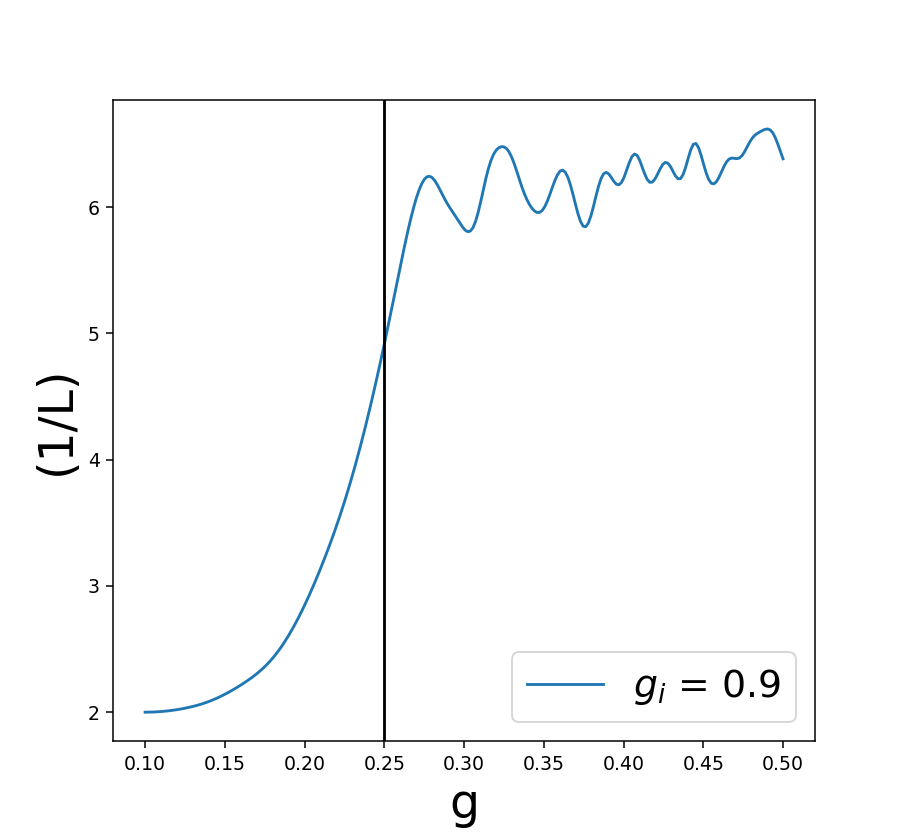

In [26]:
fig1 = plt.figure()
plt.plot(gvec, 1/(telc), '-', label = '$g_{i}$ = 0.9')
plt.ylabel(r'(1/L)', fontsize = 25)
plt.xlabel('g', fontsize = 25)
plt.legend(fontsize = 20)
plt.axvline(x=J, color = 'black')